# KNN

### 목표
- college_pass 데이터를 통하여 대학 ADMIT(합격)가능성 예측하기

### 목차
0. 라이브러리 및 데이터 준비하기
    1. 라이브러리 불러오기
    2. 데이터 불러오기
1. 데이터 이해하기
    1. 데이터 정보 확인
    2. 데이터 분포 확인
    3. 데이터 기술통계 확인
    4. 데이터 상관관계 확인
    5. 데이터의 시각화로 확인
2. 데이터 준비하기
    1. 결측치 처리
    2. x, y 분리
    3. 학습용, 평가용 데이터 분리
3. 모델링
    1. 불러오기
    2. 선언하기
    3. 학습하기
    4. 예측하기
    5. 평가하기

# 0. 라이브러리 및 데이터 준비하기

기본 라이브러리와 데이터를 불러온다.

In [12]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore') # 경고 무시
%config InlineBackend.figure_format = 'retina' # 시각화 이미지 고해상도 출력하기

In [13]:
# 데이터 읽어오기
path = './data/college_pass.csv'
data = pd.read_csv(path)

In [14]:
data.head()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


**데이터 설명**

- GRE: GRE Scores (out of 340)
- TOEFL: TOEFL Scores (out of 120)
- RANK: University Rating (out of 5)
- SOP: Statement of Purpose Strength (out of 5)
- LOR: Letter of Recommendation Strength (out of 5)
- GPA: Undergraduate GPA (out of 10)
- RESEARCH: Research Experience (either 0 or 1)
- ADMIT: Chance of Admit (either 0 or 1)

# 1.데이터 이해하기

데이터를 충분히 이해할 수 있도록 다양한 탐색 과정 수행한다.

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GRE       500 non-null    int64  
 1   TOEFL     500 non-null    int64  
 2   RANK      500 non-null    int64  
 3   SOP       500 non-null    float64
 4   LOR       500 non-null    float64
 5   GPA       500 non-null    float64
 6   RESEARCH  500 non-null    int64  
 7   ADMIT     500 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 31.4 KB


- 데이터의 결측치는 없는 것으로 확인 된다.

#### 각 데이터별, 기술통계를 확인해보자
```
data.describe().t
```

In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE,500.0,316.47200,11.295148,290.0,308.0000,317.00,325.00,340.00
TOEFL,500.0,107.19200,6.081868,92.0,103.0000,107.00,112.00,120.00
RANK,500.0,3.11400,1.143512,1.0,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.0,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.0,3.0000,3.50,4.00,5.00
GPA,500.0,8.57644,0.604813,6.8,8.1275,8.56,9.04,9.92
RESEARCH,500.0,0.56000,0.496884,0.0,0.0000,1.00,1.00,1.00
ADMIT,500.0,0.43600,0.496384,0.0,0.0000,0.00,1.00,1.00


#### 데이터 분포를 확인해보자.
```
sns.countplot(x=data['ADMIT'])
plt.show()
```

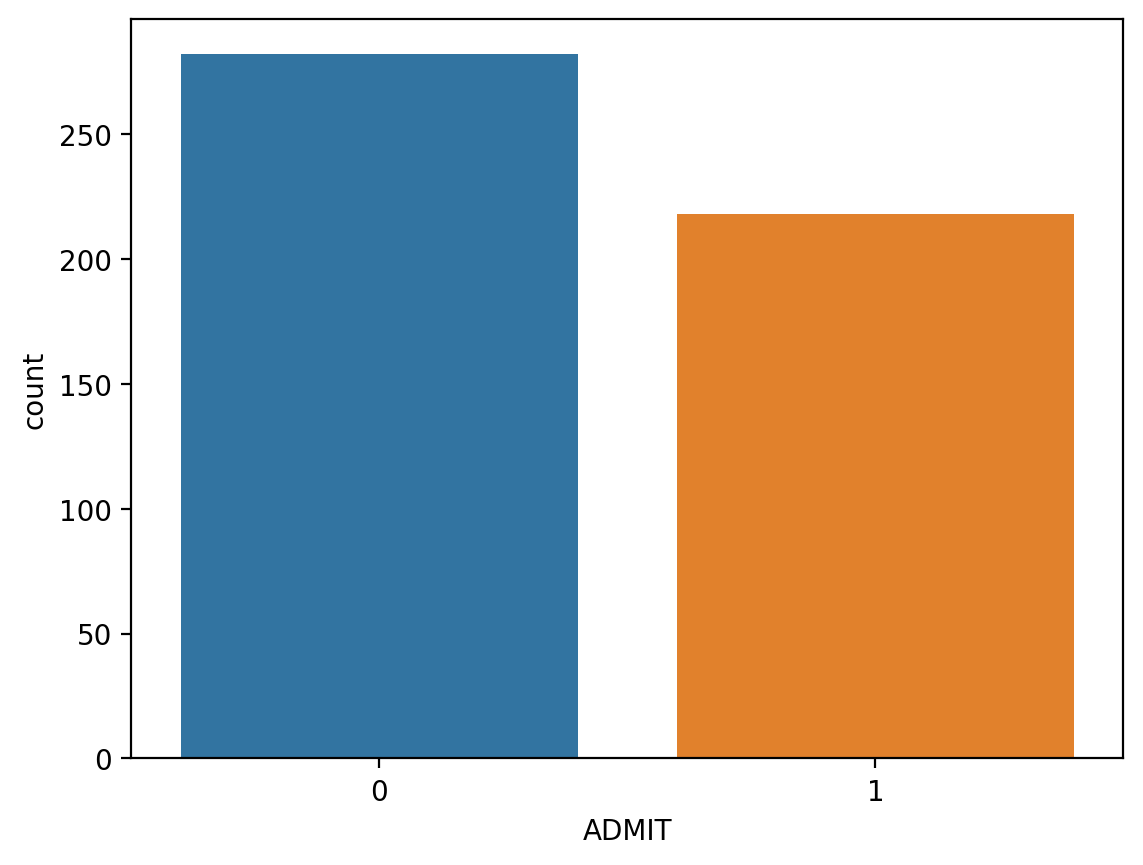

In [40]:
sns.countplot(x=data['ADMIT'])
plt.show()

#### 각 데이터별, 상관관계 확인 및 시각화 해보자
```
# 상관관계 확인
data.corr()

# 시각화
sns.heatmap(data.corr(),
           annot = True,
           cmap = 'Blues',
           fmt='.2f')
plt.show()

- annot : 글자 표시
- cmap : 색상표
- fmt : 포맷형식(숫자 얼만큼 나오게 할지)
- square : 정사각형 만들지 말지
- annot_kws : 키워드별 수정사항
```

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
GRE,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.701671
TOEFL,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.680503
RANK,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.618367
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.606876
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.536527
GPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.752196
RESEARCH,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.503104
ADMIT,0.701671,0.680503,0.618367,0.606876,0.536527,0.752196,0.503104,1.000000


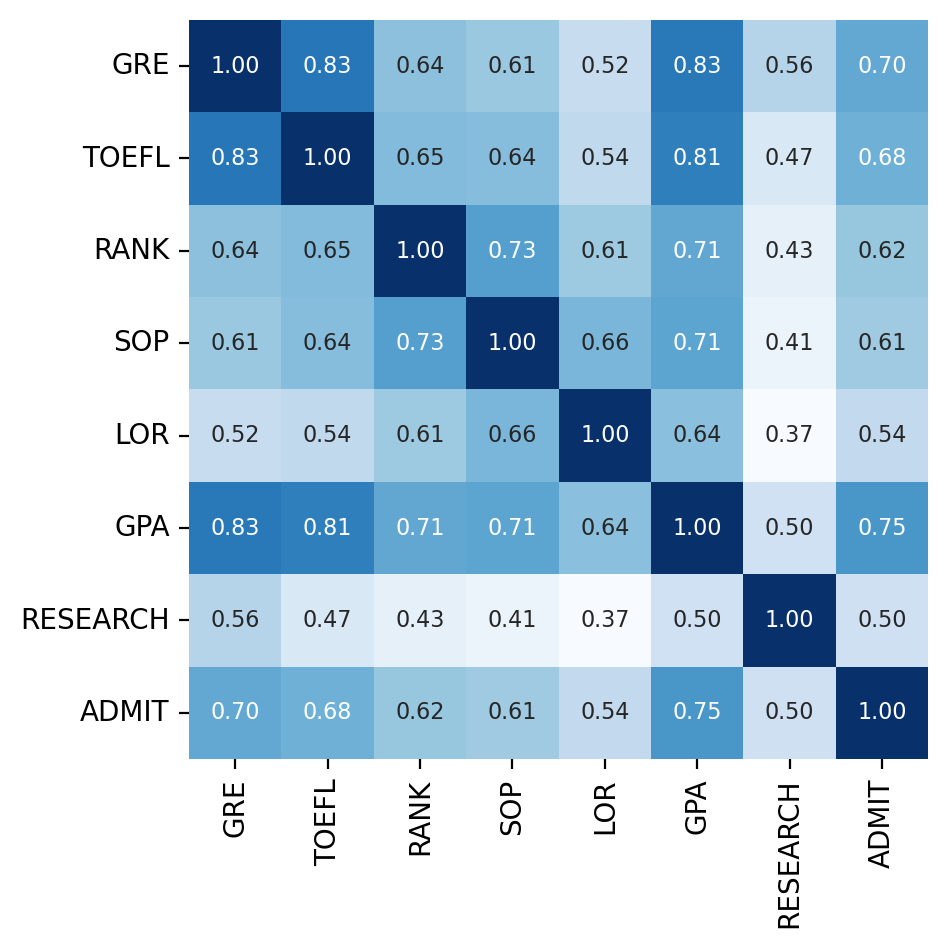

In [18]:
display(data.corr())
sns.heatmap(data.corr(),
           annot = True,
           cmap = 'Blues',
           fmt='.2f',
           cbar=False,
           square=True,
           annot_kws={'size':8})
plt.show()

# 2. 데이터 준비하기
전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비한다.
1. 결측치 처리
2. 변수 제거
3. x, y 분리
4. 학습용 평가용 데이터 분리

#### 1. 결측치 처리
```
data.isna().sum() # 결측치 몇개인지 보기
data.fillna(method='ffill'm inplace=True) # 전날 값으로 결측치 채우기
```

In [21]:
data.isna().sum()

GRE         0
TOEFL       0
RANK        0
SOP         0
LOR         0
GPA         0
RESEARCH    0
ADMIT       0
dtype: int64

#### 2. x, y 분리
- target 변수를 명확히 지정한다. : ADMIT
- target을 제외한 변수를 x 데이터프레임으로 선언
- y데이터프레임은 target변수만을 가진다

In [22]:
# target 확인
target = 'ADMIT'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]

#### 3. 학습용, 평가용 데이터 분리
- 학습용, 평가용 데이터를 적절한 비율로 분리한다.
- 반복 실행 시 동일한 결과를 얻기 위해 random_state 옵션을 지정한다.

In [23]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 학습용 : 테스트용을 7:3 비율로 분리한다.
# train_test_split의 경우 데이터를 섞은 후, 분리한다.
# 그렇기 때문에 random_state 설정이 없을 경우 테스트 때마다 결과값이 달라질 수 있다.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [24]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(350, 7)
(150, 7)
(350,)
(150,)


In [46]:
x_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
13,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26
61,0.17171,25.0,5.13,0,0.453,5.966,93.4,6.8185,8,284,19.7,378.08,14.44
377,9.82349,0.0,18.10,0,0.671,6.794,98.8,1.3580,24,666,20.2,396.90,21.24
39,0.02763,75.0,2.95,0,0.428,6.595,21.8,5.4011,3,252,18.3,395.63,4.32
365,4.55587,0.0,18.10,0,0.718,3.561,87.9,1.6132,24,666,20.2,354.70,7.12


# 3. 모델링
모델을 **선언**하고, **학습**하고, **평가**하는 과정을 진행한다

0. 문제 구분하기 -> 회귀인지 분류인지
1. 불러오기
2. 선언하기
3. 학습하기
3. 예측하기
4. 평가하기

#### 1. 불러오기
- 알고리즘 : KNeighborsClassifier
- 평가 방법 : accuracy_score

In [25]:
from sklearn.neighbors import KNeighborsClassifier

#### 2. 선언하기

In [27]:
model = KNeighborsClassifier()

#### 3. 학습하기

In [28]:
model.fit(x_train, y_train)

KNeighborsClassifier()

#### 4. 예측하기

In [29]:
y_pred = model.predict(x_test)

print(y_pred[:10]) # 예측값 10개 보기
print(y_test.values[:10]) # 실제값 10개 보기

[0 0 1 0 1 0 0 1 1 0]
[0 1 1 0 1 0 1 0 1 0]


#### 5. 평가하기

**1) Confusion Matrix**

In [33]:
# 모듈 불러오기
from sklearn.metrics import confusion_matrix

# 성능 평가
print(f"Accuracy{confusion_matrix(y_test, y_pred)}")

Accuracy[[76  8]
 [16 50]]


**2) Accuracy**

$$\large Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$$

In [32]:
# 모듈 불러오기
from sklearn.metrics import accuracy_score

# 성능 평가
print(f"Accuracy{accuracy_score(y_test, y_pred)}")

Accuracy0.84


**3) Precision**

$$\large Precision = \frac{TP}{TP+FP}$$

In [34]:
# 모듈 불러오기
from sklearn.metrics import precision_score

# 성능 평가
print(f"Accuracy{precision_score(y_test, y_pred)}")

Accuracy0.8620689655172413


**4) Recall**

$$\large Recall = \frac{TP}{TP+FN}$$

In [35]:
# 모듈 불러오기
from sklearn.metrics import recall_score

# 성능 평가
print(f"Accuracy{recall_score(y_test, y_pred)}")

Accuracy0.7575757575757576


**5) F1-Score**

$$\large F1 = \frac{2\times Precision\times Recall}{Precision+Recall}$$

In [37]:
# 모듈 불러오기
from sklearn.metrics import f1_score

# 성능 평가
print(f"Accuracy{f1_score(y_test, y_pred)}")

Accuracy0.8064516129032258


**6) Classification Report**

In [36]:
# 모듈 불러오기
from sklearn.metrics import classification_report

# 성능 평가
print(f"Accuracy{classification_report(y_test, y_pred)}")

Accuracy              precision    recall  f1-score   support

           0       0.83      0.90      0.86        84
           1       0.86      0.76      0.81        66

    accuracy                           0.84       150
   macro avg       0.84      0.83      0.84       150
weighted avg       0.84      0.84      0.84       150

